In [119]:
import pandas as pd
import numpy as np

train_titanic = pd.read_csv('/home/tuandinh/Desktop/ML and AI/Spaceship Titanic competiton/datasets/train.csv')
titanic = pd.read_csv('/home/tuandinh/Desktop/ML and AI/Spaceship Titanic competiton/datasets/train.csv')
print(train_titanic.shape)
train_titanic.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [120]:
train_titanic.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [121]:
train_titanic["Transported"].unique()

array([False,  True])

In [122]:
train_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


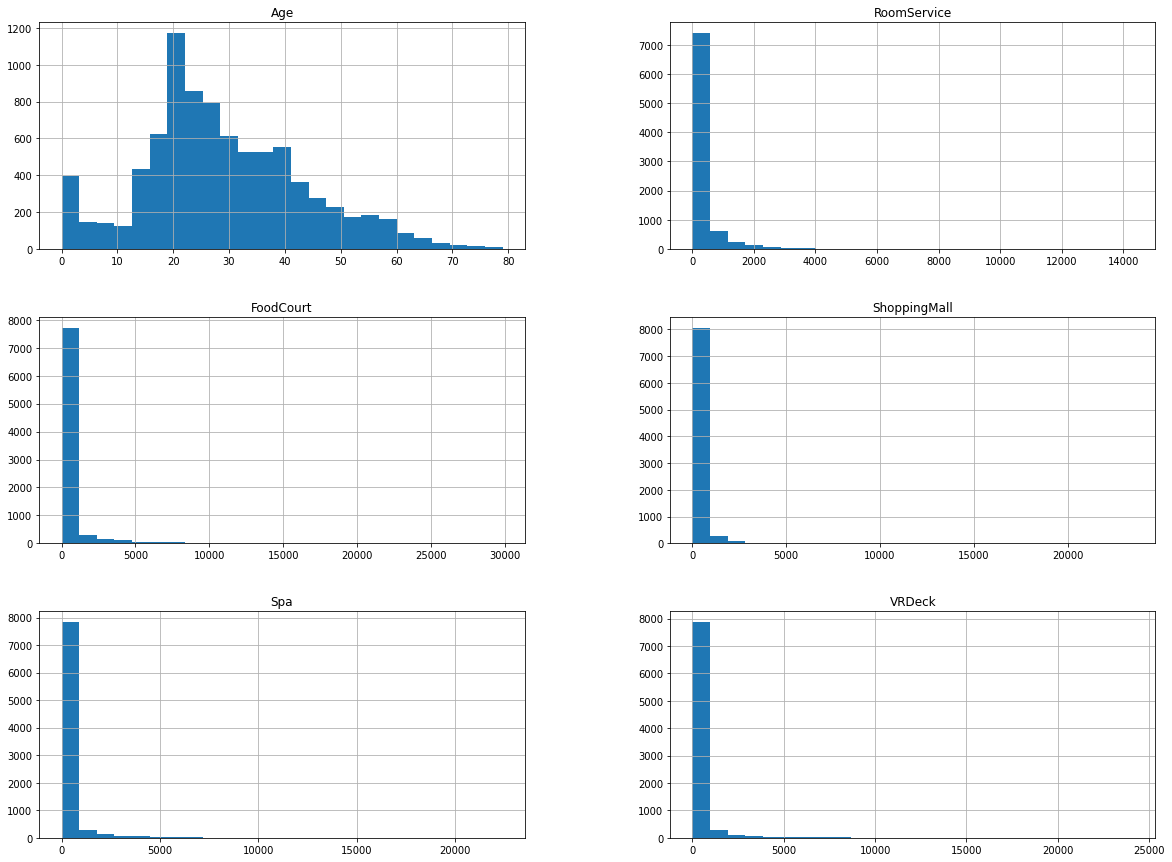

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt

train_titanic.hist(bins=25, figsize=(20,15))
plt.show()

### Prepare data with numeric categories

In [124]:
attribs_numeric = ["Age","RoomService", "FoodCourt","ShoppingMall","Spa","VRDeck"]
train_titanic_num = train_titanic[attribs_numeric].copy()
train_titanic_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [125]:
train_titanic_num.isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [126]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [127]:
X = imputer.fit_transform(train_titanic_num)

In [128]:
imputer.statistics_

array([ 28.82793047, 224.68761748, 458.07720329, 173.72916912,
       311.13877791, 304.8547913 ])

In [129]:
X_data = pd.DataFrame(X, columns=attribs_numeric)
X_data.isnull().sum()


Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

## Handling Text and Categorical Attributes

In [130]:
attribs_cat = ["CryoSleep", "VIP"]
titanic_cat = train_titanic[attribs_cat].copy()
titanic_cat.head(9)

,CryoSleep,VIP
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False
5,False,False
6,False,False
7,True,False
8,False,False


In [131]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
titanic_cat_encoded = ordinal_encoder.fit_transform(titanic_cat)
titanic_cat_encoded[:5]

array([[0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.]])

In [132]:
titanic_cat_encoded.shape

(8693, 2)

In [133]:
ordinal_encoder.categories_

[array([False, True, nan], dtype=object),
 array([False, True, nan], dtype=object)]

In [134]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)
titanic_cat_1hot.shape

(8693, 6)

## Custom Transformers

> + **Tôi muốn gộp các chi tiêu của hành khách lại thành một bảng khác. Vậy nên tôi phải cử lí mising value cho các thuộc tính đó trước.**

In [135]:
mean = train_titanic["RoomService"].mean()
train_titanic["RoomService"].fillna(mean, inplace=True)
mean = train_titanic["FoodCourt"].mean()
train_titanic["FoodCourt"].fillna(mean, inplace=True)
mean = train_titanic["ShoppingMall"].mean()
train_titanic["ShoppingMall"].fillna(mean, inplace=True)
mean = train_titanic["Spa"].mean()
train_titanic["Spa"].fillna(mean, inplace=True)
mean = train_titanic["VRDeck"].mean()
train_titanic["VRDeck"].fillna(mean, inplace=True)
train_titanic.isnull().sum()
median = train_titanic["Age"].median()
train_titanic["Age"].fillna(median, inplace=True)
train_titanic = train_titanic.drop("Name", axis = 1)
train_titanic.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [138]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
train_titanic = imputer.fit_transform(train_titanic)
train_titanic.shape


(8693, 13)

In [140]:
train_titanic = pd.DataFrame(train_titanic, columns=titanic.drop("Name", axis=1).columns)
train_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [141]:
col_names = "RoomService", "FoodCourt","ShoppingMall","Spa","VRDeck"
roomservice_ix, foodcourt_ix, shopping_ix, spa_ix, vrCheck_ix = [
    train_titanic.columns.get_loc(c) for c in col_names] # get the column indices
print(roomservice_ix, foodcourt_ix, shopping_ix, spa_ix, vrCheck_ix)

7 8 9 10 11


In [142]:
from sklearn.base import BaseEstimator, TransformerMixin
col_names = "RoomService", "FoodCourt","ShoppingMall","Spa","VRDeck"
roomservice_ix, foodcourt_ix, shopping_ix, spa_ix, vrCheck_ix = [
    train_titanic.columns.get_loc(c) for c in col_names] # get the column indices
print(roomservice_ix, foodcourt_ix, shopping_ix, spa_ix, vrCheck_ix)

class CombineSpendingMoneyOfPerson(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        spending_money = X[:,roomservice_ix] + X[:,foodcourt_ix] + X[:, shopping_ix] + X[:, spa_ix] + X[:,vrCheck_ix]
        return np.c_[X,spending_money]

attr_adder = CombineSpendingMoneyOfPerson()
train_titanic_extra_attribs = attr_adder.transform(train_titanic)

7 8 9 10 11


InvalidIndexError: (slice(None, None, None), 7)